In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 数据读取

## 1.1 读取成绩表，学生网络行为表, 学籍表, 学生信息表

In [2]:
df_score = pd.read_csv('score.csv')
df_bnet = pd.read_csv('t_app_online_out.txt',sep=';')
df_roll = pd.read_csv('roll.csv')
df_std = pd.read_csv('student.csv')

# 2. 数据清洗

## 2. 1对成绩表进行清洗

In [3]:
df_score.head()

,学号,学年,学期码,考试日期,课程号,等级成绩,课程成绩,成绩编号,学分,课程属性代码,修读方式代码,课序号,成绩录入方式代码
0,201434063,2017-2018,1,20180114,1110020010,11.0,65.0,1110020010201446033201801142017-20181500ln,3.5,1.0,4.0,500,1
1,201505099,2017-2018,1,20180114,1110020010,12.0,52.0,1110020010201559009201801142017-20181500ln,3.5,1.0,4.0,500,1
2,201625067,2016-2017,2,20170625,1020820011,12.0,54.0,1020820011201656027201706252016-20172500ln,2.0,3.0,4.0,500,1
3,201629056,2017-2018,2,20180701,1120020032,13.0,76.0,1120020032201695026201807012017-20182500ln,5.0,1.0,6.0,500,1
4,201518039,2017-2018,2,20180701,1110020020,13.0,78.0,1110020020201583019201807012017-20182500ln,3.0,1.0,4.0,500,1


### 2.1.1 过滤为必修成绩

去除无用特征

In [4]:
df_score = df_score[['学号','学年','学期码','考试日期','课程成绩','学分','课程属性代码']]

课程属性代码为1的是必修成绩

In [5]:
kccj = df_score[df_score['课程属性代码'] != 1]
score_req = df_score.drop(axis = 0,labels = kccj.index)

In [6]:
score_req.drop(columns=['课程属性代码'],inplace=True,axis=1)

In [7]:
score_req.head(2)

,学号,学年,学期码,考试日期,课程成绩,学分
0,201434063,2017-2018,1,20180114,65.0,3.5
1,201505099,2017-2018,1,20180114,52.0,3.5


In [8]:
score_req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357303 entries, 0 to 1843183
Data columns (total 6 columns):
学号      1357303 non-null int64
学年      1357303 non-null object
学期码     1357303 non-null int64
考试日期    1357303 non-null int64
课程成绩    1357303 non-null float64
学分      1357303 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 72.5+ MB


### 2.1.2 标准化考试时间时间格式

In [9]:
ksrq = score_req[score_req['考试日期']<200701]
ksrq

,学号,学年,学期码,考试日期,课程成绩,学分
294453,201424055,2017-2018,2,180701,70.0,15.0
410544,201445018,2017-2018,3,180729,80.0,3.0
436355,201710084,2018-2019,1,190119,85.0,2.0
499422,201506061,2018-2019,1,190119,60.0,0.5
667471,201526069,2018-2019,1,190119,70.0,0.5
820998,201740018,2018-2019,1,190119,92.0,0.5
823004,201454050,2017-2018,3,180701,0.0,0.5
825615,201740018,2018-2019,1,190119,89.0,1.0
889976,201406110,2017-2018,3,180729,78.0,3.0
943048,201536148,2018-2019,1,190119,92.0,2.0


In [10]:
for i in ksrq.index:
    score_req.loc[i,'考试日期'] = score_req.loc[i,'考试日期'] + 20000000

将考试时间先从int转化为str，再转化为datetime格式

In [11]:
import datetime as dt

In [12]:
score_req['考试日期'] = score_req['考试日期'].apply(str)

In [13]:
score_req['考试日期'] = score_req['考试日期'].apply(lambda x:dt.datetime.strptime(x,'%Y%m%d'))

### 2.1.3 处理学年异常数据

查看学年信息

In [14]:
score_req['学年'].value_counts()

2017-2018    399468
2016-2017    353526
2015-2016    263397
2018-2019    206169
2014-2015    134742
2012-2013         1
Name: 学年, dtype: int64

In [15]:
score_req[score_req['学年'] == '2012-2013']

,学号,学年,学期码,考试日期,课程成绩,学分
794783,201553047,2012-2013,1,2017-01-15,60.0,3.0


2015年的学生考试学年为2012-2013，应该是系统问题导致数据错误

In [16]:
score_req.loc[794783,'学年'] = '2016-2017'

### 2.1.4 处理学分为0的情况

In [17]:
score_req['学分'].value_counts()

2.0     383565
3.0     261659
1.0     250839
0.5      94529
1.5      73337
4.0      72844
2.5      70371
3.5      68282
5.0      29637
6.0      20695
4.5      14312
6.5       9135
15.0      4968
7.5        968
0.0        615
10.0       454
8.0        413
5.5        235
12.0       180
16.0       170
14.0        95
Name: 学分, dtype: int64

In [18]:
score_req[score_req['学分']==0]['课程成绩'].value_counts()

60.0    615
Name: 课程成绩, dtype: int64

学分为0的课程成绩全为60，0学分异常值，对后面计算加权平均分有影响，考虑去掉

In [19]:
xf = score_req[score_req['学分']==0]
score_req.drop(labels=xf.index,axis=0,inplace=True)

## 2.2 学籍表

In [20]:
df_roll.head(2)

,xh,yxsh,zym,sznj
0,201489089,308,7003,2014
1,201539270,310,6403,2015


In [21]:
df_roll.dtypes

xh      int64
yxsh    int64
zym     int64
sznj    int64
dtype: object

In [22]:
df_roll['yxsh'] = df_roll['yxsh'].apply(str)
df_roll['zym'] = df_roll['zym'].apply(str)

## 2.3 网络行为表

In [23]:
df_bnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516585 entries, 0 to 516584
Data columns (total 6 columns):
appid        516585 non-null int64
appname      516585 non-null object
xh           516585 non-null object
starttime    516585 non-null object
lasttime     516585 non-null object
startday     516584 non-null object
dtypes: int64(1), object(5)
memory usage: 23.6+ MB


### 2.3.1 bnet学号是object类型，且还有字母开头的不规范的学号，删除

In [24]:
bnet_eng = df_bnet[df_bnet['xh']>'A00000000']

In [25]:
df_bnet.drop(labels=bnet_eng.index,inplace=True)

将bnet学号转为int类型，方便与score_req对应

In [26]:
df_bnet['xh'] = df_bnet['xh'].apply(pd.to_numeric)

In [27]:
df_bnet['xh'].dtypes

dtype('int64')

## 2.4 学生信息表

In [28]:
df_std.head(2)

,xh,xm,xb,mzm,zzmmm,age
0,201519324,张*蔚,男,1.0,3.0,22.0
1,201507048,徐*,女,1.0,3.0,22.0


In [29]:
df_std.drop(columns=['xm','zzmmm','age'],inplace=True)

In [30]:
df_std.columns=['xh','sex','nation']

In [31]:
df_std.sex.value_counts()

男       21801
女       10677
未知性别        1
Name: sex, dtype: int64

In [32]:
xb = df_std[df_std['sex']=='未知性别']
df_std.drop(labels=xb.index,inplace=True)

# 3. 特征工程

## 3.1 网络行为表

**网络行为按照学号，学年，学期码分类**

In [33]:
df_bnet.head(2)

,appid,appname,xh,starttime,lasttime,startday
0,3131,绝地求生,201657036,2019/04/09 23:27:57.000000000,2019/04/10 00:00:00.000000000,2019/04/09 00:00:00.000
1,3063,火影忍者,201738080,2019/04/09 22:50:15.000000000,2019/04/09 22:53:37.000000000,2019/04/09 00:00:00.000


In [34]:
df_bnet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511113 entries, 0 to 516584
Data columns (total 6 columns):
appid        511113 non-null int64
appname      511113 non-null object
xh           511113 non-null int64
starttime    511113 non-null object
lasttime     511113 non-null object
startday     511112 non-null object
dtypes: int64(2), object(4)
memory usage: 27.3+ MB


In [35]:
df_bnet.isnull().sum()

appid        0
appname      0
xh           0
starttime    0
lasttime     0
startday     1
dtype: int64

In [36]:
df_bnet[df_bnet['startday'].isnull()]

,appid,appname,xh,starttime,lasttime,startday
516584,3577,王者荣耀,201747026,2019/01/07 21:45:32.000000000,2019/01/07 22:28:08.000000,NaN


**startday 可以用starttime 的date替换**

**保留appid或appname*
1. 将starttime、lasttime 转换成datetime格式,并计算时间间隔delta**
2. 将starttime分离出date和time，并将date代替startday，同理将lasttime分离出date和time**
3. 待研究：使用app时长delta,开始使用时间start_time，和结束时间end_time**
4. 用学号连接成绩表，看app的使用对成绩有无影响，对课程有无影响**

### 3.1.1 将网络行为的starttime分解为日期和时间和星期, 将lasttime分解为日期和时间

In [37]:
from datetime import datetime as dt
from datetime import timedelta

In [38]:
df_bnet['starttime'] = pd.to_datetime(df_bnet['starttime'])
df_bnet['start_day'] = df_bnet.starttime.dt.date
df_bnet['start_time'] = df_bnet['starttime'].dt.time
df_bnet['weekday'] = df_bnet['starttime'].dt.dayofweek

In [39]:
df_bnet['lasttime'] = pd.to_datetime(df_bnet['lasttime'])
df_bnet['last_day'] = df_bnet['lasttime'].dt.date
df_bnet['last_time'] = df_bnet['lasttime'].dt.time

In [40]:
df_bnet.head()

,appid,appname,xh,starttime,lasttime,startday,start_day,start_time,weekday,last_day,last_time
0,3131,绝地求生,201657036,2019-04-09 23:27:57,2019-04-10 00:00:00,2019/04/09 00:00:00.000,2019-04-09,23:27:57,1,2019-04-10,00:00:00
1,3063,火影忍者,201738080,2019-04-09 22:50:15,2019-04-09 22:53:37,2019/04/09 00:00:00.000,2019-04-09,22:50:15,1,2019-04-09,22:53:37
2,3131,绝地求生,201639158,2019-04-09 19:54:17,2019-04-09 20:54:18,2019/04/09 00:00:00.000,2019-04-09,19:54:17,1,2019-04-09,20:54:18
3,3063,火影忍者,201716110,2019-04-09 18:20:37,2019-04-09 18:23:06,2019/04/09 00:00:00.000,2019-04-09,18:20:37,1,2019-04-09,18:23:06
4,3063,火影忍者,201716110,2019-04-09 12:14:53,2019-04-09 12:16:40,2019/04/09 00:00:00.000,2019-04-09,12:14:53,1,2019-04-09,12:16:40


### 3.1.2 统计网络行为时长last

In [41]:
df_bnet['time_delta'] = df_bnet['lasttime'] - df_bnet['starttime']

last : 上网时长 单位为小时

In [42]:
df_bnet['last'] = df_bnet['time_delta'].dt.total_seconds()/(60*60)

### 3.1.3 确定网络行为开始时间所属的学年和学期

In [43]:
#score_req['学年'].value_counts()

In [44]:
#xq1 = score_req[score['学期码']==3]
#xq1.sort_values(by='考试日期')
#####按学年分组查看各个学年对应的学期时间
#xn_2014_2015 = score_req[score_req['学年'] == '2014-2015']
#xn_2015_2016 = score_req[score_req['学年'] == '2015-2016']
#xn_2016_2017 = score_req[score_req['学年'] == '2016-2017']
#xn_2017_2018 = score_req[score_req['学年'] == '2017-2018']
#xn_2018_2018 = score_req[score_req['学年'] == '2018-2019']

In [45]:
#xq1 = xn_2014_2015[df_score['学期码']==2]
#xq1.sort_values(by='考试日期')

**按照上网记录的时间给bnet添加学年学期属性**
- 2014-2015学年：2014-09-01 到 2015-07-31
- 2015-2016学年：2015-09-01 到 2016-07-31
- 2016-2017学年：2016-09-01 到 2017-07-31
- 2017-2018学年：2017-09-01 到 2018-07-31
- 2018-2019学年：2018-09-01 到 2019-07-31

In [46]:
### 学年学期映射函数
def to_xn(x):
    y = x.strftime('%Y-%m-%d')
    if(y>='2014-09-01'and y<='2015-01-31'):
        return '2014-2015-1'
    elif(y>'2015-01-31' and y<='2015-07-01'):
        return '2014-2015-2'
    elif(y>'2015-07-01' and y<='2015-09-01'):
        return '2014-2015-3'
    elif(y>'2015-09-01'and y<='2016-01-31'):
        return '2015-2016-1'
    elif(y>'2016-01-31' and y<='2016-07-01'):
        return '2015-2016-2'
    elif(y>'2016-07-01' and y<='2016-09-01'):
        return '2015-2016-3'
    elif(y>'2016-09-01'and y<='2017-01-31'):
        return '2016-2017-1'
    elif(y>'2017-01-31' and y<='2017-07-01'):
        return '2016-2017-2'
    elif(y>'2017-07-01' and y<='2017-09-01'):
        return '2016-2017-3'
    elif(y>'2017-09-01'and y<='2018-01-31'):
        return '2017-2018-1'
    elif(y>'2018-01-31' and y<='2018-07-01'):
        return '2017-2018-2'
    elif(y>'2018-07-01' and y<='2018-09-01'):
        return '2017-2018-3'
    elif(y>'2018-09-01' and y<='2019-01-31'):
        return '2018-2019-1'
    else:
        return '2018-2019-2'

In [47]:
df_bnet['xn'] = df_bnet['start_day'].apply(to_xn)

In [48]:
df_bnet['xn'].isnull().sum()

0

**将学年期分解为学年和学期**

In [49]:
df_bnet['xq'] = df_bnet['xn'].apply(lambda x:x[10:11])
df_bnet['xn'] = df_bnet['xn'].apply(lambda x:x[0:9])

将学期转换为int

In [50]:
df_bnet['xq'] = df_bnet['xq'].apply(pd.to_numeric)

In [51]:
df_bnet.head(3)

,appid,appname,xh,starttime,lasttime,startday,start_day,start_time,weekday,last_day,last_time,time_delta,last,xn,xq
0,3131,绝地求生,201657036,2019-04-09 23:27:57,2019-04-10 00:00:00,2019/04/09 00:00:00.000,2019-04-09,23:27:57,1,2019-04-10,00:00:00,00:32:03,0.534167,2018-2019,2
1,3063,火影忍者,201738080,2019-04-09 22:50:15,2019-04-09 22:53:37,2019/04/09 00:00:00.000,2019-04-09,22:50:15,1,2019-04-09,22:53:37,00:03:22,0.056111,2018-2019,2
2,3131,绝地求生,201639158,2019-04-09 19:54:17,2019-04-09 20:54:18,2019/04/09 00:00:00.000,2019-04-09,19:54:17,1,2019-04-09,20:54:18,01:00:01,1.000278,2018-2019,2


### 3.1.4 将appname按照属性分类，游戏、直播、影音、短视频

In [52]:
game = ['王者荣耀','绝地求生','英雄联盟','穿越火线','地下城','剑灵','梦三国','欢乐斗地主','FIFA Online','火影忍者','穿越火线：枪战王者','QQ飞车手游','QQ炫舞','逆战','QQ飞车','QQ炫舞手游','全名冠军足球','龙之谷','天天酷跑','雷霆战机','疾风之刃','阴阳师','绝地求生：全军出击','魔兽']
vedio = ['优酷','腾讯','爱奇艺','央视影音','风行','PP视频','哔哩哔哩','乐视','暴风影音','土豆','芒果TV','搜狐视频','爆米花网','看看视频','江苏TV']
live = ['虎牙直播','一直播','斗鱼直播','企鹅电竞','腾讯NOW','网易CC','战旗直播','熊猫直播','触手tv','花椒直播','映客直播','全民直播','网易直播','龙珠直播','YY直播']
vine = ['快手','抖音','火山小视频','腾讯微视','爱拍原创','梨视频','第一视频','今视网']

In [53]:
df_bnet['variety'] = df_bnet['appname'].apply(lambda x:'game' if x in game else('vedio' if x in vedio else('live' if x in live else 'vine')))

### 3.1.5 根据starttime将网络访问时间划分为morning、afternoon、evening、night
- morning 7:00-12:00
- afternoon 12:00-19:00
- evening 19:00-23:00
- night 23:00-7:00

In [54]:
### 时间段转换函数
def to_section(x):
    y = x.strftime('%H:%M:%S')
    if(y>'07:00:00'and y<='12:00:00'):
        return 'morning'
    elif(y>'12:00:00' and y<='19:00:00'):
        return 'afternoon'
    elif(y>'19:00:00'and y<='23:00:00'):
        return 'evening'
    else:
        return 'night'

In [55]:
df_bnet['section'] = df_bnet['start_time'].apply(to_section)

In [56]:
net = df_bnet[['xh','xn','xq','variety','section','last','weekday']]

In [57]:
net.head(4)

,xh,xn,xq,variety,section,last,weekday
0,201657036,2018-2019,2,game,night,0.534167,1
1,201738080,2018-2019,2,game,evening,0.056111,1
2,201639158,2018-2019,2,game,evening,1.000278,1
3,201716110,2018-2019,2,game,afternoon,0.041389,1


### 3.1.6 统计variety, section, last, weekday

In [58]:
net_copy = net.copy()
net_copy.drop(columns=['variety','section','last','weekday'],axis=1,inplace=True)

**根据学号，学年，学期分组，对不同的variety的时长进行统计，并得出一个总的last**

In [59]:
net_varlast = net.copy()
net_varlast['game_time'] = net_varlast.apply(lambda x:x['last'] if x['variety']=='game' else 0 ,axis=1)
net_varlast['vedio_time'] = net_varlast.apply(lambda x:x['last'] if x['variety']=='vedio' else 0 ,axis=1)
net_varlast['live_time'] = net_varlast.apply(lambda x:x['last'] if x['variety']=='live' else 0 ,axis=1)
net_varlast['vine_time'] = net_varlast.apply(lambda x:x['last'] if x['variety']=='vine' else 0 ,axis=1)

In [60]:
net_group = net_varlast.groupby(['xh','xn','xq'])['game_time','vedio_time','live_time','vine_time'].sum()

In [61]:
net_group.head()

game_time  vedio_time  live_time  vine_time
xh        xn        xq                                             
201400001 2018-2019 1    0.000000    2.058056   0.000000   0.000000
                    2    1.788889    0.376111   0.000000   0.266389
201400002 2018-2019 2    1.751667    0.051667   0.480556   0.000000
201400003 2018-2019 2    0.000000    0.000556   0.000000   0.000000
201400004 2018-2019 1    2.013056    0.000278   0.000000   0.000000

In [62]:
net1 = pd.merge(net_copy,net_group,left_on=['xh','xn','xq'],right_index=True)

In [63]:
net1.drop_duplicates(inplace=True)

计算总上网时长total_time

In [64]:
net1['total_time'] = net1['game_time']+net1['vedio_time']+net1['live_time']+net1['vine_time']

**各个不同variety的次数(应该没有必要了，跟时长有点重复)**

net_var = net.copy()
net_var['game_count'] = net_var['variety'].apply(lambda x:1 if x=='game' else 0)
net_var['vedio_count'] = net_var['variety'].apply(lambda x:1 if x=='vedio' else 0)
net_var['live_count'] = net_var['variety'].apply(lambda x:1 if x=='live' else 0)
net_var['vine_count'] = net_var['variety'].apply(lambda x:1 if x=='vine' else 0)

net_var.head()

net_group2 = net_var.groupby(['xh','xn'])['game_count','vedio_count','live_count','vine_count'].sum()

net_group2.head()

net2 = pd.merge(net_copy,net_group2,left_on=['xh','xn','xq],right_index=True)

net2.head(3)

net2.shape

net2.drop_duplicates(inplace=True)

net2['totalvar_count'] = net2['game_count']+net2['vedio_count']+net2['live_count']+net2['vine_count']

net2.shape

**根据学号，学年，学期分组，对不同的section的时长进行统计**

In [65]:
net_sec = net.copy()
net_sec['mor_count'] = net_sec.apply(lambda x:x['last'] if x['section']=='morning' else 0 ,axis=1)
net_sec['aft_count'] = net_sec.apply(lambda x:x['last'] if x['section']=='afternoon' else 0 ,axis=1)
net_sec['eve_count'] = net_sec.apply(lambda x:x['last'] if x['section']=='evening' else 0 ,axis=1)
net_sec['nig_count'] = net_sec.apply(lambda x:x['last'] if x['section']=='night' else 0 ,axis=1)

In [66]:
net_group3 = net_sec.groupby(['xh','xn','xq'])['mor_count','aft_count','eve_count','nig_count'].sum()

In [67]:
net_group3.head()

mor_count  aft_count  eve_count  nig_count
xh        xn        xq                                            
201400001 2018-2019 1    0.000000   1.523889   0.534167   0.000000
                    2    0.265556   0.286389   1.290000   0.589444
201400002 2018-2019 2    0.001389   0.752778   1.417500   0.112222
201400003 2018-2019 2    0.000000   0.000000   0.000556   0.000000
201400004 2018-2019 1    0.000278   2.004722   0.008333   0.000000

In [68]:
net3 = pd.merge(net_copy,net_group3,left_on=['xh','xn','xq'],right_index=True)

In [69]:
net3.shape

(511113, 7)

In [70]:
net3.drop_duplicates(inplace=True)

In [71]:
net3.shape

(29182, 7)

**根据学号，学年，学期分组，对不同的weekday的次数进行统计**

In [72]:
net['weekday'].dtypes

dtype('int64')

In [73]:
net['weekday'].value_counts()

0    124153
4    102789
3     95243
6     75397
1     46250
5     43541
2     23740
Name: weekday, dtype: int64

In [74]:
net_wd = net.copy()
net_wd['Sun'] = net_wd.apply(lambda x:x['last'] if x['weekday']==0 else 0,axis=1)
net_wd['Mon'] = net_wd.apply(lambda x:x['last'] if x['weekday']==1 else 0,axis=1)
net_wd['Tue'] = net_wd.apply(lambda x:x['last'] if x['weekday']==2 else 0,axis=1)
net_wd['Wed'] = net_wd.apply(lambda x:x['last'] if x['weekday']==3 else 0,axis=1)
net_wd['Thu'] = net_wd.apply(lambda x:x['last'] if x['weekday']==4 else 0,axis=1)
net_wd['Fri'] = net_wd.apply(lambda x:x['last'] if x['weekday']==5 else 0,axis=1)
net_wd['Sat'] = net_wd.apply(lambda x:x['last'] if x['weekday']==6 else 0,axis=1)

In [75]:
net_group4 = net_wd.groupby(['xh','xn','xq'])['Sun','Mon','Tue','Wed','Thu','Fri','Sat'].sum()

In [76]:
net4 = pd.merge(net_copy,net_group4,left_on=['xh','xn','xq'],right_index=True)

In [77]:
net4.drop_duplicates(inplace=True)

In [78]:
net4.head(3)

,xh,xn,xq,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201657036,2018-2019,2,13.019444,5.667222,4.273333,3.634167,5.844167,0.531389,9.728611
1,201738080,2018-2019,2,0.672778,0.056111,0.000000,0.000000,0.000278,0.000000,0.060278
2,201639158,2018-2019,2,0.640000,2.270833,0.000278,0.000000,0.000000,0.000000,0.100556


### 3.1.7 合并网络行为表

In [79]:
network = pd.merge(net1,net3)
network = pd.merge(network,net4)
network.head(3)

,xh,xn,xq,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201657036,2018-2019,2,36.351389,2.697500,3.649444,0.0,42.698333,2.391389,26.117222,3.665833,10.523889,13.019444,5.667222,4.273333,3.634167,5.844167,0.531389,9.728611
1,201738080,2018-2019,2,0.056111,0.673056,0.060278,0.0,0.789444,0.049167,0.011389,0.056111,0.672778,0.672778,0.056111,0.000000,0.000000,0.000278,0.000000,0.060278
2,201639158,2018-2019,2,2.371667,0.640000,0.000000,0.0,3.011667,0.000000,0.357500,2.014167,0.640000,0.640000,2.270833,0.000278,0.000000,0.000000,0.000000,0.100556


In [80]:
network.shape

(29182, 19)

## 3.2 成绩表

### 3.2.1 计算每学年每学期的加权平均分

In [81]:
score_req['总分'] = score_req ['课程成绩'] * score_req['学分']

In [82]:
score_group = score_req.groupby(['学号','学年','学期码'])[['总分','学分']].sum()

In [83]:
score_group['加权平均分'] = score_group['总分'] / score_group['学分']

In [84]:
score_group.head(3)

总分    学分      加权平均分
学号        学年        学期码                         
201400001 2014-2015 1     210.0   4.0  52.500000
          2015-2016 1    1210.5  17.5  69.171429
                    2    1346.0  24.0  56.083333

In [85]:
score_group.drop(columns=['总分','学分'],axis=1,inplace=True)
score_group.head(2)

加权平均分
学号        学年        学期码           
201400001 2014-2015 1    52.500000
          2015-2016 1    69.171429

### 3.2.2 计算挂科次数

In [86]:
score_req['学年挂科次数'] = score_req['课程成绩'].apply(lambda x:1 if x<60 else 0)

In [87]:
score_group2 = score_req.groupby(['学号','学年','学期码'])[['学年挂科次数']].sum()

In [88]:
score_group2.head(3)

学年挂科次数
学号        学年        学期码        
201400001 2014-2015 1         1
          2015-2016 1         0
                    2         2

### 3.2.3 滤除无用属性

In [89]:
score_req.head(2)

,学号,学年,学期码,考试日期,课程成绩,学分,总分,学年挂科次数
0,201434063,2017-2018,1,2018-01-14,65.0,3.5,227.5,0
1,201505099,2017-2018,1,2018-01-14,52.0,3.5,182.0,1


In [90]:
score = score_req.drop(columns=['考试日期','课程成绩','学分','总分','学年挂科次数'])

### 3.2.4 合并成绩表

In [91]:
score = pd.merge(score,score_group,left_on=['学号','学年','学期码'],right_index=True)
score = pd.merge(score,score_group2,left_on=['学号','学年','学期码'],right_index=True)

In [92]:
#score.rename(columns={'学期码':'学期'},inplace=True)

In [93]:
score.head(2)

,学号,学年,学期码,加权平均分,学年挂科次数
0,201434063,2017-2018,1,66.111111,0
165403,201434063,2017-2018,1,66.111111,0


In [94]:
score.shape

(1356688, 5)

In [95]:
score.drop_duplicates(inplace=True)

In [96]:
score.shape

(197527, 5)

### 3.2.5 是否挂过科

In [97]:
score['挂科'] = score['学年挂科次数'].apply(lambda x:'1' if x>0 else '0')

In [98]:
score.head(2)

,学号,学年,学期码,加权平均分,学年挂科次数,挂科
0,201434063,2017-2018,1,66.111111,0,0
1,201505099,2017-2018,1,33.880000,17,1


## 3.3 合并成绩表，学籍表, 学生信息表和网络行为表

## 3.3.1 合并成绩表和学籍表

In [99]:
score.columns=['xh','xn','xq','avg_score','fail_count','fail']

In [100]:
df_roll.head(3)

,xh,yxsh,zym,sznj
0,201489089,308,7003,2014
1,201539270,310,6403,2015
2,201559179,356,9111,2015


In [101]:
df_roll.rename(columns={'yxsh':'faculty','zym':'specialty'},inplace=True)

In [102]:
score = pd.merge(score,df_roll,how='left')
score.isnull().sum()

xh            0
xn            0
xq            0
avg_score     0
fail_count    0
fail          0
faculty       0
specialty     0
sznj          0
dtype: int64

### 3.3.2 合并成绩表和学生信息表

In [103]:
score = pd.merge(score,df_std,how='left')

In [104]:
score.head(3)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation
0,201434063,2017-2018,1,66.111111,0,0,339,6915,2014,男,1.0
1,201505099,2017-2018,1,33.880000,17,1,301,5028,2015,女,1.0
2,201629056,2017-2018,2,53.272727,3,1,329,8101,2016,男,1.0


### 3.3.3 合并成绩表和网络行为表

In [105]:
df = pd.merge(score,network,on=['xh','xn','xq'])

In [106]:
df.head(3)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,...,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201695012,2018-2019,1,70.700000,0,0,352,6110,2016,女,...,0.190556,0.177778,0.048611,0.000000,0.0,0.096389,0.000000,0.000000,0.423889,0.0
1,201625017,2018-2019,1,86.384615,0,0,352,6110,2016,男,...,3.105556,6.030556,0.000000,1.474722,0.0,0.000000,5.623333,0.000000,2.038056,0.0
2,201675025,2018-2019,1,86.851852,0,0,352,6107,2016,男,...,4.202778,2.500556,0.550000,0.839444,0.0,0.000000,4.087778,0.435833,1.890278,0.0


In [107]:
df.shape

(14947, 27)

In [108]:
df.describe()

,xh,xq,avg_score,fail_count,sznj,nation,game_time,vedio_time,live_time,vine_time,...,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
count,1.494700e+04,14947.000000,14947.000000,14947.000000,14947.000000,14947.0,14947.000000,14947.000000,14947.000000,14947.000000,...,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000,14947.000000
mean,2.016849e+08,1.125376,76.703955,0.709641,2016.456948,1.0,5.446376,1.230916,0.028598,0.019610,...,2.709687,2.035299,0.696049,1.194398,0.667417,0.318901,1.994713,1.180553,0.915302,0.454215
std,1.182589e+05,0.363702,14.124016,2.049237,1.146649,0.0,19.883319,5.568528,0.428363,0.540095,...,9.768659,5.135436,3.085488,4.073495,2.970813,2.547573,5.136511,3.705707,3.865744,3.297188
min,2.014000e+08,1.000000,0.000000,0.000000,2014.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015980e+08,1.000000,72.447542,0.000000,2015.000000,1.0,0.000000,0.000278,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016941e+08,1.000000,80.055556,0.000000,2016.000000,1.0,0.398889,0.014167,0.000000,0.000000,...,0.188611,0.117778,0.000000,0.000278,0.000000,0.000000,0.034444,0.000000,0.000000,0.000000
75%,2.017894e+08,1.000000,85.704793,0.000000,2017.000000,1.0,5.308333,0.679028,0.000000,0.000000,...,2.400139,2.329722,0.475972,0.865833,0.035972,0.000000,1.722083,0.894722,0.413333,0.000000
max,2.018994e+08,3.000000,100.000000,26.000000,2018.000000,1.0,984.606389,272.251944,26.109444,48.254167,...,477.422500,194.907500,163.566389,187.405000,145.312778,149.048889,123.999444,134.548611,140.591667,128.857500


In [109]:
import seaborn

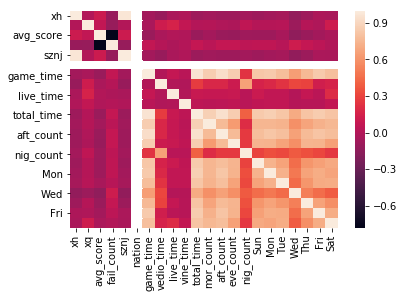

In [110]:
seaborn.heatmap(df.corr())

In [111]:
df.corr()

,xh,xq,avg_score,fail_count,sznj,nation,game_time,vedio_time,live_time,vine_time,...,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
xh,1.000000,0.000172,0.110457,-0.105174,0.973769,NaN,-0.059336,-0.100592,-0.027830,-0.004088,...,-0.078278,-0.078092,-0.056879,-0.079904,-0.057674,-0.045882,-0.123973,-0.084006,-0.020509,-0.034270
xq,0.000172,1.000000,0.067353,-0.109688,0.001393,NaN,-0.031454,0.120118,0.160556,0.069285,...,-0.002482,-0.022158,0.057703,0.018017,0.015257,0.026204,-0.085162,0.019338,-0.014459,0.117025
avg_score,0.110457,0.067353,1.000000,-0.780122,0.114460,NaN,-0.093781,-0.027731,0.001859,-0.005718,...,-0.092847,-0.103105,-0.076447,-0.078778,-0.080690,-0.036096,-0.137808,-0.095020,-0.058270,-0.025354
fail_count,-0.105174,-0.109688,-0.780122,1.000000,-0.107628,NaN,0.074018,0.017528,-0.020249,0.009935,...,0.076408,0.081242,0.051312,0.058898,0.055851,0.026476,0.120178,0.080692,0.044963,0.000786
sznj,0.973769,0.001393,0.114460,-0.107628,1.000000,NaN,-0.062058,-0.102025,-0.029901,-0.002504,...,-0.081576,-0.080772,-0.058282,-0.081346,-0.059776,-0.048316,-0.127669,-0.087124,-0.023386,-0.034921
nation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_time,-0.059336,-0.031454,-0.093781,0.074018,-0.062058,NaN,1.000000,0.001660,0.076445,0.028594,...,0.936851,0.856231,0.237336,0.826264,0.843327,0.790231,0.645775,0.766839,0.845242,0.797719
vedio_time,-0.100592,0.120118,-0.027731,0.017528,-0.102025,NaN,0.001660,1.000000,0.002956,-0.002372,...,0.181775,0.115201,0.661532,0.161444,0.188383,0.240303,0.313426,0.300086,0.136061,0.158956
live_time,-0.027830,0.160556,0.001859,-0.020249,-0.029901,NaN,0.076445,0.002956,1.000000,0.005307,...,0.082931,0.094211,0.029074,0.105328,0.066835,0.064730,0.009379,0.079547,0.039364,0.206250
vine_time,-0.004088,0.069285,-0.005718,0.009935,-0.002504,NaN,0.028594,-0.002372,0.005307,1.000000,...,0.046550,0.060990,0.027690,0.058978,0.066417,0.064534,0.016672,0.026292,0.020994,0.070220


In [112]:
df.columns

Index(['xh', 'xn', 'xq', 'avg_score', 'fail_count', 'fail', 'faculty',
       'specialty', 'sznj', 'sex', 'nation', 'game_time', 'vedio_time',
       'live_time', 'vine_time', 'total_time', 'mor_count', 'aft_count',
       'eve_count', 'nig_count', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri',
       'Sat'],
      dtype='object')

## 3.5 PCA分析

In [113]:
from sklearn.decomposition import PCA
pca = PCA()
df_num = df[['xh','avg_score','fail_count','sznj','game_time','vedio_time','live_time','total_time','mor_count','aft_count','nig_count','Sun','Mon','Tue','Wed','Thu','Fri','Sat']].values
newData = pca.fit_transform(df_num)

In [115]:
df_ratio = pd.DataFrame(index=['xh','avg_score','fail_count','sznj','game_time','vedio_time','live_time','total_time','mor_count','aft_count','nig_count','Sun','Mon','Tue','Wed','Thu','Fri','Sat'],data = pca.explained_variance_ratio_,columns=['ratio'])
df_ratio.sort_values(by='ratio',ascending=False,inplace=True)
df_ratio

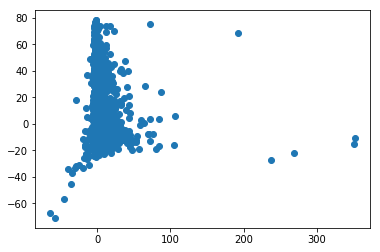

In [118]:
plt.scatter(newData[:, 3], newData[:, 2],marker='o')
plt.show()

# 4. 数据可视化

## 4.1 上网时段时长的变化

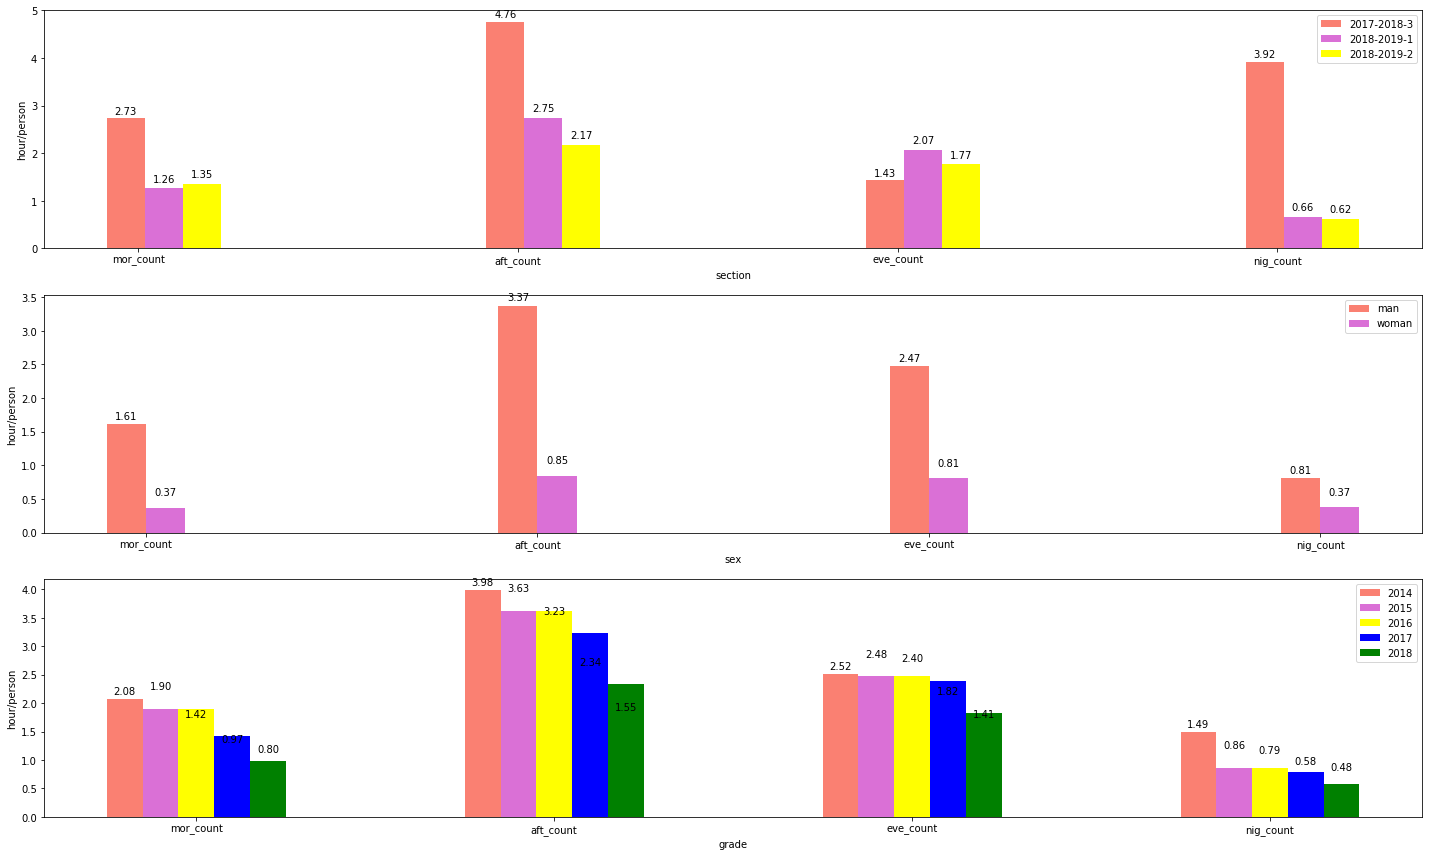

In [118]:
plt.figure(figsize=(20,12))

### 两个学期相比
df_secxn = df.groupby(['xn','xq'])['mor_count','aft_count','eve_count','nig_count'].sum()
### 三个学期的人数
df_numxn = df.groupby(['xn','xq'])['xh'].count()
df_numxn

plt.subplot(3,1,1)
X1 = np.arange(4)
z1 = df_numxn[0]
z2 = df_numxn[1]
z3 = df_numxn[2]
y1=[df_secxn.loc['2017-2018',3]['mor_count']/z1,df_secxn.loc['2017-2018',3]['aft_count']/z1,df_secxn.loc['2017-2018',3]['eve_count']/z1,df_secxn.loc['2017-2018',3]['nig_count']/z1]
y2=[df_secxn.loc['2018-2019',1]['mor_count']/z2,df_secxn.loc['2018-2019',1]['aft_count']/z2,df_secxn.loc['2018-2019',1]['eve_count']/z2,df_secxn.loc['2018-2019',1]['nig_count']/z2]
y3=[df_secxn.loc['2018-2019',2]['mor_count']/z3,df_secxn.loc['2018-2019',2]['aft_count']/z3,df_secxn.loc['2018-2019',2]['eve_count']/z3,df_secxn.loc['2018-2019',2]['nig_count']/z3]
bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X1,y1,bar_width,label='2017-2018-3',color='salmon')
plt.bar(X1+bar_width,y2,bar_width,label='2018-2019-1',color='orchid')
plt.bar(X1+bar_width*2,y3,bar_width,label='2018-2019-2',color='yellow')

for x,y in zip(X1,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X1,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X1,y3):
    plt.text(x+bar_width*2,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
    
plt.legend(loc='best')
plt.xlabel('section')
plt.ylabel('hour/person')
plt.xticks(X1+bar_width/3,tick_label)


### 男女生相比
df_secsex = df.groupby(['sex'])['mor_count','aft_count','eve_count','nig_count'].sum()

### 男女生人数
df_numsex = df.groupby(['sex'])['xh'].count()
df_numsex

plt.subplot(3,1,2)
X2 =np.arange(4)
z2 = df_numsex[0]
z1 = df_numsex[1]
y1=[df_secsex.loc['男']['mor_count']/z1,df_secsex.loc['男']['aft_count']/z1,df_secsex.loc['男']['eve_count']/z1,df_secsex.loc['男']['nig_count']/z1]
y2=[df_secsex.loc['女']['mor_count']/z2,df_secsex.loc['女']['aft_count']/z2,df_secsex.loc['女']['eve_count']/z2,df_secsex.loc['女']['nig_count']/z2]

bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X2,y1,bar_width,label='man',color='salmon')
plt.bar(X2+bar_width,y2,bar_width,label='woman',color='orchid')

for x,y in zip(X2,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X2,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment

plt.legend(loc='best')
plt.xlabel('sex')
plt.ylabel('hour/person')
plt.xticks(X2+bar_width/2,tick_label)



### 所在年级相比
df_secnj = df.groupby(['sznj'])['mor_count','aft_count','eve_count','nig_count'].sum()

### 所在年级人数
df_numnj = df.groupby(['sznj'])['xh'].count()
df_numnj

plt.subplot(3,1,3)

X3 =np.arange(4)
z1 = df_numnj[2014]
z2 = df_numnj[2015]
z3 = df_numnj[2016]
z4 = df_numnj[2017]
z5 = df_numnj[2018]

y1=[df_secnj.loc[2014]['mor_count']/z1,df_secnj.loc[2014]['aft_count']/z1,df_secnj.loc[2014]['eve_count']/z1,df_secnj.loc[2014]['nig_count']/z1]
y2=[df_secnj.loc[2015]['mor_count']/z2,df_secnj.loc[2015]['aft_count']/z2,df_secnj.loc[2015]['eve_count']/z2,df_secnj.loc[2015]['nig_count']/z2]
y3=[df_secnj.loc[2016]['mor_count']/z3,df_secnj.loc[2016]['aft_count']/z3,df_secnj.loc[2016]['eve_count']/z3,df_secnj.loc[2016]['nig_count']/z3]
y4=[df_secnj.loc[2017]['mor_count']/z4,df_secnj.loc[2017]['aft_count']/z4,df_secnj.loc[2017]['eve_count']/z4,df_secnj.loc[2017]['nig_count']/z4]
y5=[df_secnj.loc[2018]['mor_count']/z5,df_secnj.loc[2018]['aft_count']/z5,df_secnj.loc[2018]['eve_count']/z5,df_secnj.loc[2018]['nig_count']/z5]

bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X3,y1,bar_width,label='2014',color='salmon')
plt.bar(X3+bar_width,y2,bar_width,label='2015',color='orchid')
plt.bar(X3+bar_width*2,y2,bar_width,label='2016',color='yellow')
plt.bar(X3+bar_width*3,y3,bar_width,label='2017',color='blue')
plt.bar(X3+bar_width*4,y4,bar_width,label='2018',color='green')

for x,y in zip(X2,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X2,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y3):
    plt.text(x+bar_width*2,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y4):
    plt.text(x+bar_width*3,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y5):
    plt.text(x+bar_width*4,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment

plt.legend(loc='best')
plt.xlabel('grade')
plt.ylabel('hour/person')
plt.xticks(X3+bar_width*4/2,tick_label)

'''
### 所在星期几相比
df_secwd = df.groupby(['weekday'])['mor_count','aft_count','eve_count','nig_count'].sum()

### 所在星期几使用网络的人数
df_numwd = df.groupby(['weekday'])['xh'].count()
df_numwd

plt.subplot(4,1,4)

X4 =np.arange(4)
z1 = df_numwd[0]
z2 = df_numwd[1]
z3 = df_numwd[2]
z4 = df_numwd[3]
z5 = df_numwd[4]
z6 = df_numwd[5]
z7 = df_numwd[6]

y1=[df_secwd.loc[0]['mor_count']/z1,df_secwd.loc[0]['aft_count']/z1,df_secwd.loc[0]['eve_count']/z1,df_secwd.loc[0]['nig_count']/z1]
y2=[df_secwd.loc[1]['mor_count']/z2,df_secwd.loc[1]['aft_count']/z2,df_secwd.loc[1]['eve_count']/z2,df_secwd.loc[1]['nig_count']/z2]
y3=[df_secwd.loc[2]['mor_count']/z3,df_secwd.loc[2]['aft_count']/z3,df_secwd.loc[2]['eve_count']/z3,df_secwd.loc[2]['nig_count']/z3]
y4=[df_secwd.loc[3]['mor_count']/z4,df_secwd.loc[3]['aft_count']/z4,df_secwd.loc[3]['eve_count']/z4,df_secwd.loc[3]['nig_count']/z4]
y5=[df_secwd.loc[4]['mor_count']/z5,df_secwd.loc[4]['aft_count']/z5,df_secwd.loc[4]['eve_count']/z5,df_secwd.loc[4]['nig_count']/z5]
y6=[df_secwd.loc[5]['mor_count']/z6,df_secwd.loc[5]['aft_count']/z6,df_secwd.loc[5]['eve_count']/z6,df_secwd.loc[5]['nig_count']/z6]
y7=[df_secwd.loc[6]['mor_count']/z7,df_secwd.loc[6]['aft_count']/z7,df_secwd.loc[6]['eve_count']/z7,df_secwd.loc[6]['nig_count']/z7]

bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X4,y1,bar_width,label='Sun',color='salmon')
plt.bar(X4+bar_width,y2,bar_width,label='Mon',color='orchid')
plt.bar(X4+bar_width*2,y3,bar_width,label='Tue',color='yellow')
plt.bar(X4+bar_width*3,y4,bar_width,label='Wed',color='blue')
plt.bar(X4+bar_width*4,y5,bar_width,label='Thu',color='green')
plt.bar(X4+bar_width*5,y6,bar_width,label='Fri',color='cyan')
plt.bar(X4+bar_width*6,y7,bar_width,label='Sat',color='red')

for x,y in zip(X4,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X4,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X4,y3):
    plt.text(x+bar_width*2,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X4,y4):
    plt.text(x+bar_width*3,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X4,y5):
    plt.text(x+bar_width*4,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X4,y6):
    plt.text(x+bar_width*5,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X4,y7):
    plt.text(x+bar_width*6,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment

plt.legend(loc='best')
plt.xlabel('weekday')
plt.ylabel('hour/person')
plt.xticks(X4+bar_width*4/2,tick_label)

plt.savefig('network_section.jpg')
'''
plt.tight_layout()

plt.show()

### 时段：
- 上网普遍集中在下午或者傍晚
- 小学期熬夜现象严重，平均凌晨2点停止上网
- 第二学期情况比第一学期的严重
- 正常学期普遍1点睡

### 性别：
- 男生上网时长比女生多一倍以上
- 男生平均凌晨1点以后睡，女生平均12点以后睡

### 年级：
- 年级越大，上网时长越大

### 工作日：
- 周二上网频率最高，其次为周五、周一、周六
- 基本是周日、周一、周二上网时长增加，周三、周四开始减少，周六到周日减少

## 4.2 挂科的变化

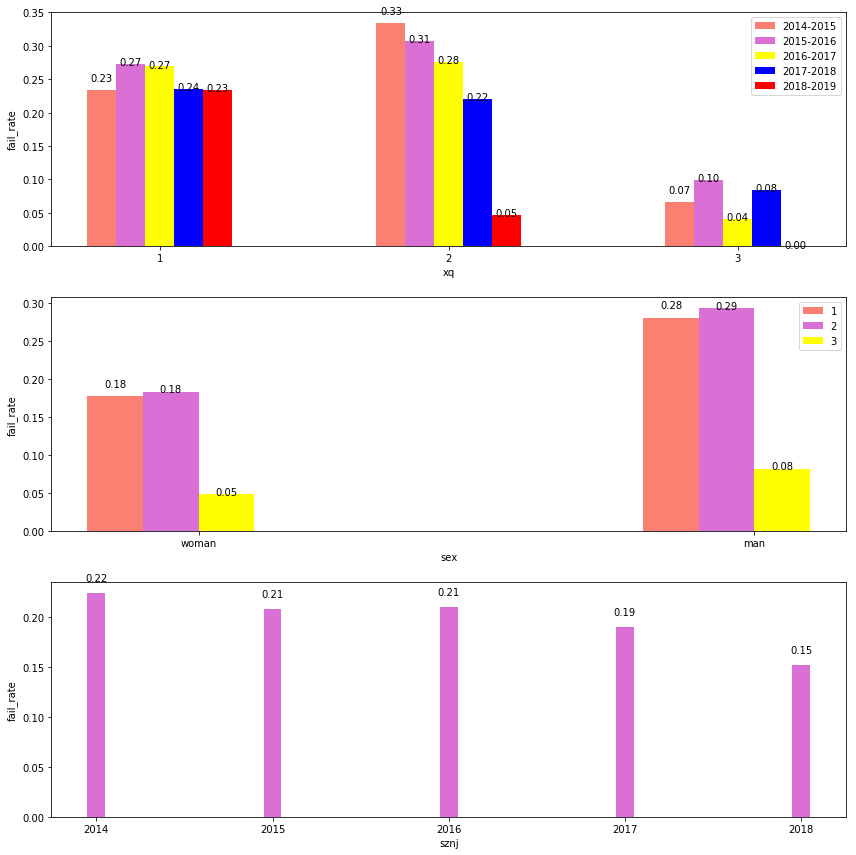

In [119]:
plt.figure(1,figsize=(12,12))

sc = score.copy()
sc['fail'] = sc['fail'].apply(pd.to_numeric)

### 三个学期相比
df_secxn = sc.groupby(['xn','xq'])['fail'].sum()
### 三个学期的人数
df_numxn = sc.groupby(['xn','xq'])['xh'].count()

num = df_numxn.values.reshape(5,3)
fail = df_secxn.values.reshape(5,3)

y = np.array(fail/num)

plt.subplot(3,1,1)
X1 = np.arange(3)

bar_width=0.1
tick_label=['1','2','3']

plt.bar(X1,y[0],bar_width,label='2014-2015',color='salmon')
plt.bar(X1+bar_width,y[1],bar_width,label='2015-2016',color='orchid')
plt.bar(X1+bar_width*2,y[2],bar_width,label='2016-2017',color='yellow')
plt.bar(X1+bar_width*3,y[3],bar_width,label='2017-2018',color='blue')
plt.bar(X1+bar_width*4,y[4],bar_width,label='2018-2019',color='red')
#for x,y in zip(X1,y1):
#    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,Y in zip(X1,y[0]):
    plt.text(x,Y+0.01,'%.2f' % Y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,Y in zip(X1,y[1]):
    plt.text(x+bar_width,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment
for x,Y in zip(X1,y[2]):
    plt.text(x+bar_width*2,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment
for x,Y in zip(X1,y[3]):
    plt.text(x+bar_width*3,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment
for x,Y in zip(X1,y[4]):
    plt.text(x+bar_width*4,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment


plt.legend(loc='best')
plt.xlabel('xq')
plt.ylabel('fail_rate')
plt.xticks(X1+bar_width*4/2,tick_label)

### 男女相比
df_sec = sc.groupby(['xq','sex'])['fail'].sum()
### 两个学期的人数
df_num = sc.groupby(['xq','sex'])['xh'].count()

num = df_num.values.reshape(3,2)
fail = df_sec.values.reshape(3,2)

y = np.array(fail/num)

plt.subplot(3,1,2)
X = np.arange(2)

bar_width=0.1
tick_label=['woman','man']

plt.bar(X,y[0],bar_width,label='1',color='salmon')
plt.bar(X+bar_width,y[1],bar_width,label='2',color='orchid')
plt.bar(X+bar_width*2,y[2],bar_width,label='3',color='yellow')
#for x,y in zip(X1,y1):
#    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,Y in zip(X,y[0]):
    plt.text(x,Y+0.01,'%.2f' % Y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,Y in zip(X,y[1]):
    plt.text(x+bar_width,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment
for x,Y in zip(X,y[2]):
    plt.text(x+bar_width*2,Y+0.01,'%.2f' % Y,ha='center',va='top') #ha=horizonal alignment


plt.legend(loc='best')
plt.xlabel('sex')
plt.ylabel('fail_rate')
plt.xticks(X+bar_width*3/2,tick_label)

### 年级相比
df_sec = sc.groupby(['sznj'])['fail'].sum()
### 各个年级的人数
df_num = sc.groupby(['sznj'])['xh'].count()

num = df_num.values.reshape(5,1).ravel()
fail = df_sec.values.reshape(5,1).ravel()

y = np.array(fail/num)
plt.subplot(3,1,3)
X = np.arange(5)

bar_width=0.1
tick_label=['2014','2015','2016','2017','2018']

plt.bar(X,y,bar_width,color='orchid')

for x,Y in zip(X,y):
    plt.text(x,Y+0.01,'%.2f' % Y,ha='center',va='bottom') #ha=horizonal alignment 对齐

plt.xlabel('sznj')
plt.ylabel('fail_rate')
plt.xticks(X,tick_label)

plt.tight_layout()
plt.show()

- 正常学期随着年级的增长，挂科率升高
- 男女生相比，女生在各个学年的挂科率更高

In [120]:
## score  df network

## 一. 学生成绩分析

In [121]:
score.head(2)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation
0,201434063,2017-2018,1,66.111111,0,0,339,6915,2014,男,1.0
1,201505099,2017-2018,1,33.880000,17,1,301,5028,2015,女,1.0


In [122]:
avg = score.groupby(['xn','xq','faculty'])[['avg_score']].mean()

In [123]:
score['faculty'].drop_duplicates().count()

30

30个院系

In [124]:
avg.describe()

,avg_score
count,350.000000
mean,74.967655
std,12.437251
min,0.000000
25%,73.850618
50%,76.236206
75%,79.906143
max,89.848916


In [125]:
avg_fail = avg[avg['avg_score']<60]
avg_fail.describe()

,avg_score
count,14.000000
mean,20.477526
std,15.966367
min,0.000000
25%,8.079167
50%,21.260906
75%,25.866422
max,48.717949


- 各个院系每年每个学期的平均分50%到达76以上
- 各个院系挂科的人平均分20分，75%的人挂科比较严重，最高才48.7分

### 学生成绩与网络时长

In [126]:
network.describe()

,xh,xq,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
count,2.918200e+04,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000,29182.000000
mean,2.016819e+08,1.550031,4.951152,1.233226,0.194311,0.097854,6.476543,1.330756,2.483766,1.968786,0.693235,1.407803,0.671765,0.323171,1.255357,1.168814,0.663628,0.986005
std,1.194158e+05,0.510150,16.838498,4.668010,1.260344,1.234807,17.800470,5.750910,8.271095,4.632340,2.665936,3.940790,2.807796,2.150813,3.976039,3.410857,3.223062,3.832215
min,2.014000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015880e+08,1.000000,0.000000,0.000278,0.000000,0.000000,0.103125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016850e+08,2.000000,0.204444,0.013333,0.000000,0.000000,1.693889,0.007778,0.167361,0.148333,0.000278,0.002500,0.000000,0.000000,0.000278,0.000556,0.000000,0.000000
75%,2.017861e+08,2.000000,4.791042,0.770833,0.000000,0.000000,7.136389,0.862778,2.239861,2.327778,0.511528,1.204722,0.067708,0.000000,0.668958,0.931597,0.042778,0.225486
max,2.019993e+08,3.000000,984.606389,272.251944,49.199167,88.287222,984.606389,397.464167,477.422500,194.907500,163.566389,187.405000,145.312778,149.048889,123.999444,134.548611,140.591667,128.857500


In [127]:
network.head(3)

,xh,xn,xq,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201657036,2018-2019,2,36.351389,2.697500,3.649444,0.0,42.698333,2.391389,26.117222,3.665833,10.523889,13.019444,5.667222,4.273333,3.634167,5.844167,0.531389,9.728611
1,201738080,2018-2019,2,0.056111,0.673056,0.060278,0.0,0.789444,0.049167,0.011389,0.056111,0.672778,0.672778,0.056111,0.000000,0.000000,0.000278,0.000000,0.060278
2,201639158,2018-2019,2,2.371667,0.640000,0.000000,0.0,3.011667,0.000000,0.357500,2.014167,0.640000,0.640000,2.270833,0.000278,0.000000,0.000000,0.000000,0.100556


In [128]:
network['xq'].value_counts()

2    15679
1    13317
3      186
Name: xq, dtype: int64

考虑到小学期的长短和课程的多少问题，将小学期和第一学期分开计算

In [129]:
net1 = network[network['xq']== 1 ]
net2 = network[network['xq']== 2 ]
net3 = network[network['xq']== 3 ]

In [130]:
net1.describe()

,xh,xq,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
count,1.331700e+04,13317.0,13317.000000,13317.000000,13317.0,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000,13317.000000
mean,2.016831e+08,1.0,5.617111,1.103896,0.0,0.003976,6.724983,1.257046,2.737228,2.068200,0.662508,1.164455,0.659530,0.305978,2.170147,1.167667,0.947884,0.309321
std,1.183206e+05,0.0,20.020302,3.447256,0.0,0.419286,20.369931,6.643862,9.695662,5.133766,2.261183,4.039541,2.932737,2.567802,5.328507,3.524088,3.848416,2.871872
min,2.014000e+08,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015960e+08,1.0,0.000000,0.000000,0.0,0.000000,0.096667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.016862e+08,1.0,0.525000,0.013056,0.0,0.000000,1.786944,0.000556,0.208611,0.152500,0.000000,0.000278,0.000000,0.000000,0.086389,0.000000,0.000000,0.000000
75%,2.017860e+08,1.0,5.570278,0.645833,0.0,0.000000,7.279167,0.719722,2.497500,2.386944,0.472222,0.847500,0.036111,0.000000,2.034722,0.912778,0.505278,0.000000
max,2.018994e+08,1.0,984.606389,86.549722,0.0,48.254167,984.606389,397.464167,477.422500,194.907500,54.776944,187.405000,145.312778,149.048889,123.999444,132.141944,140.591667,126.996111


- 对第一学期来说，只有25%的学生学期网络总时长的超过7.28小时，这与具有网络行为数据的学生中22%多的挂科率相对应
- 最大网络时长竟达到984.6小时，75%在7.28小时以下，平均时长达到6.72小时，两极分化严重
- 访问网络时间段多在下午和晚上，都是学习可用时间
- 在访问网络的站点来看，75%是游戏

In [131]:
# 按每天一小时来算，判断网络时长为多久才算沉迷
df_bnet.head(1)

,appid,appname,xh,starttime,lasttime,startday,start_day,start_time,weekday,last_day,last_time,time_delta,last,xn,xq,variety,section
0,3131,绝地求生,201657036,2019-04-09 23:27:57,2019-04-10,2019/04/09 00:00:00.000,2019-04-09,23:27:57,1,2019-04-10,00:00:00,00:32:03,0.534167,2018-2019,2,game,night


In [132]:
days = df_bnet[['starttime','xn','xq']]
days['days'] = days['starttime'].dt.strftime('%Y%m%d').apply(pd.to_numeric)
day1 = days[days['xq']==1]
day2 = days[days['xq']==2]
day3 = days[days['xn']=='2017-2018']

C:\Users\Marc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
day1.drop(columns=['starttime'],inplace=True)
day2.drop(columns=['starttime'],inplace=True)
day3.drop(columns=['starttime'],inplace=True)

C:\Users\Marc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [134]:
day1 = day1.drop_duplicates()
day2 = day3.drop_duplicates()
day3 = day3.drop_duplicates()

In [135]:
len(day1)

139

In [136]:
len(day2)

17

In [137]:
len(day3)

17

# 网络数据中第一学期139天，第二学期17天，第三学期17天

 按照一天一个小时来算，总时长分别为139小时，17小时，17小时
 对于网络时长较大的同学进行分析

In [138]:
pd.set_option('display.max_columns',30)
df.head(1)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201695012,2018-2019,1,70.7,0,0,352,6110,2016,女,1.0,0.423889,0.096389,0.0,0.0,0.520278,0.103333,0.190556,0.177778,0.048611,0.0,0.0,0.096389,0.0,0.0,0.423889,0.0


In [139]:
netsc = df[['xh','xn','xq','avg_score','fail_count','fail','sex','sznj','total_time','nig_count']]

In [140]:
netsc1 = netsc[netsc['total_time']>=139]
netsc1 = netsc1[netsc1['xq']==1]
netsc2 = netsc[netsc['total_time']>=17]
netsc2 = netsc2[netsc2['xq']==2]
netsc3 = netsc[netsc['total_time']>=17]
netsc3 = netsc3[netsc3['xq']==3]

In [141]:
netsc1.describe()

,xh,xq,avg_score,fail_count,sznj,total_time,nig_count
count,3.400000e+01,34.0,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2.016286e+08,1.0,70.032759,1.529412,2015.941176,290.814428,6.902672
std,1.157268e+05,0.0,16.743703,3.359611,1.099344,194.857069,10.409899
min,2.014700e+08,1.0,22.378947,0.000000,2014.000000,143.691111,0.000000
25%,2.015253e+08,1.0,68.412202,0.000000,2015.000000,161.670139,0.710903
50%,2.016100e+08,1.0,75.328671,0.000000,2016.000000,206.449444,2.083472
75%,2.017221e+08,1.0,78.966912,0.750000,2017.000000,368.039583,9.226319
max,2.018810e+08,1.0,89.428571,13.000000,2018.000000,984.606389,45.129444


In [142]:
len(netsc1)

34

第一学期
- 平均分为70，但是挂科数最高为13，平均时长高，熬夜现象严重

In [143]:
netsc2.describe()

,xh,xq,avg_score,fail_count,sznj,total_time,nig_count
count,1.380000e+02,138.0,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2.016564e+08,2.0,77.336439,0.065217,2016.159420,38.315652,2.894287
std,1.270485e+05,0.0,12.908991,0.275695,1.245408,56.582858,3.671663
min,2.014000e+08,2.0,0.000000,0.000000,2014.000000,17.024444,0.000000
25%,2.015460e+08,2.0,70.000000,0.000000,2015.000000,21.317569,0.529375
50%,2.016261e+08,2.0,81.500000,0.000000,2016.000000,25.931111,1.674306
75%,2.017621e+08,2.0,86.750000,0.000000,2017.000000,37.232569,3.424722
max,2.018942e+08,2.0,96.000000,2.000000,2018.000000,628.332778,17.120833


In [144]:
len(netsc2)

138

第二学期
- 平均分77，最高挂科数为2，总时长过高，熬夜相对较轻
- 均分高，挂科少是因为考试少的缘故

In [145]:
netsc3.describe()

,xh,xq,avg_score,fail_count,sznj,total_time,nig_count
count,2.300000e+01,23.0,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.015779e+08,3.0,81.229710,0.043478,2015.347826,78.600531,27.104553
std,9.472454e+04,0.0,18.698335,0.208514,0.775107,82.665027,49.538799
min,2.014060e+08,3.0,0.000000,0.000000,2014.000000,17.596944,0.000000
25%,2.015121e+08,3.0,81.625000,0.000000,2015.000000,23.086528,1.410139
50%,2.015640e+08,3.0,85.000000,0.000000,2015.000000,42.428611,7.796389
75%,2.016381e+08,3.0,88.700000,0.000000,2016.000000,84.661806,14.220972
max,2.017891e+08,3.0,93.000000,1.000000,2017.000000,272.251944,163.566389


In [146]:
len(netsc3)

23

第三学期
- 均分80，因为基本没什么考试，大部分人网络时长较高，喜欢熬夜

## 二. 网络行为

- 两级分化，沉迷网络和不怎么接触
- 沉迷网络的熬夜现象严重，均分较低

## 三. 挂科

In [147]:
df_fail = df[df['fail_count']>0]
df_fail.head(1)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
3,201608133,2018-2019,1,70.618182,2,1,353,7802,2016,女,1.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0


In [148]:
total = len(df)
t_man = len(df[df['sex']=='男'])
t_woman = len(df[df['sex']=='女'])
stu = len(df_fail)
man = len(df_fail[df_fail['sex']=='男'])
woman = len(df_fail[df_fail['sex']=='女'])

In [149]:
print(total,t_man,t_woman,stu,man,woman)

14947 11034 3913 3045 2540 505


In [150]:
r_man = man/t_man
r_woman = woman/t_woman
r_total = stu/total
print(r_man,r_woman,r_total)

0.23019757114373754 0.1290569895221058 0.20371980999531678


- 总挂科率为22.7%
- 男生挂科率比女生挂科率高10%

In [151]:
sec1 = df[df['xn']=='2018-2019']
sec1 = sec1[sec1['xq']==1]
sec1_fail = df_fail[df_fail['xn']=='2018-2019']
sec1_fail = sec1_fail[sec1_fail['xq']==1]

sec1_total = len(sec1)
sec1_tman = len(sec1[sec1['sex']=='男'])
sec1_twoman = len(sec1[sec1['sex']=='女'])
sec1_stu = len(sec1_fail)
sec1_man = len(sec1_fail[sec1_fail['sex']=='男'])
sec1_woman = len(sec1_fail[sec1_fail['sex']=='女'])

In [152]:
print(sec1_total,sec1_tman,sec1_twoman,sec1_stu,sec1_man,sec1_woman)

13242 9829 3413 2957 2468 489


In [153]:
sec1_rman = sec1_man/sec1_tman
sec1_rwoman = woman/sec1_twoman
sec1_rtotal = sec1_stu/sec1_total
print(sec1_rman,sec1_rwoman,sec1_rtotal)

0.2510937023094923 0.14796366832698507 0.22330463676181847


- 总挂科率为22.33%，男生挂科率为25.11%，女生挂科率为14.80%
- 男女挂科比率差符合总体规律，而且22.33%的挂科率对应网络行为的25%时长在7.6小时以上

In [154]:
df.head(2)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201695012,2018-2019,1,70.700000,0,0,352,6110,2016,女,1.0,0.423889,0.096389,0.0,0.0,0.520278,0.103333,0.190556,0.177778,0.048611,0.000000,0.0,0.096389,0.000000,0.0,0.423889,0.0
1,201625017,2018-2019,1,86.384615,0,0,352,6110,2016,男,1.0,9.136111,0.000000,0.0,0.0,9.136111,0.000000,3.105556,6.030556,0.000000,1.474722,0.0,0.000000,5.623333,0.0,2.038056,0.0


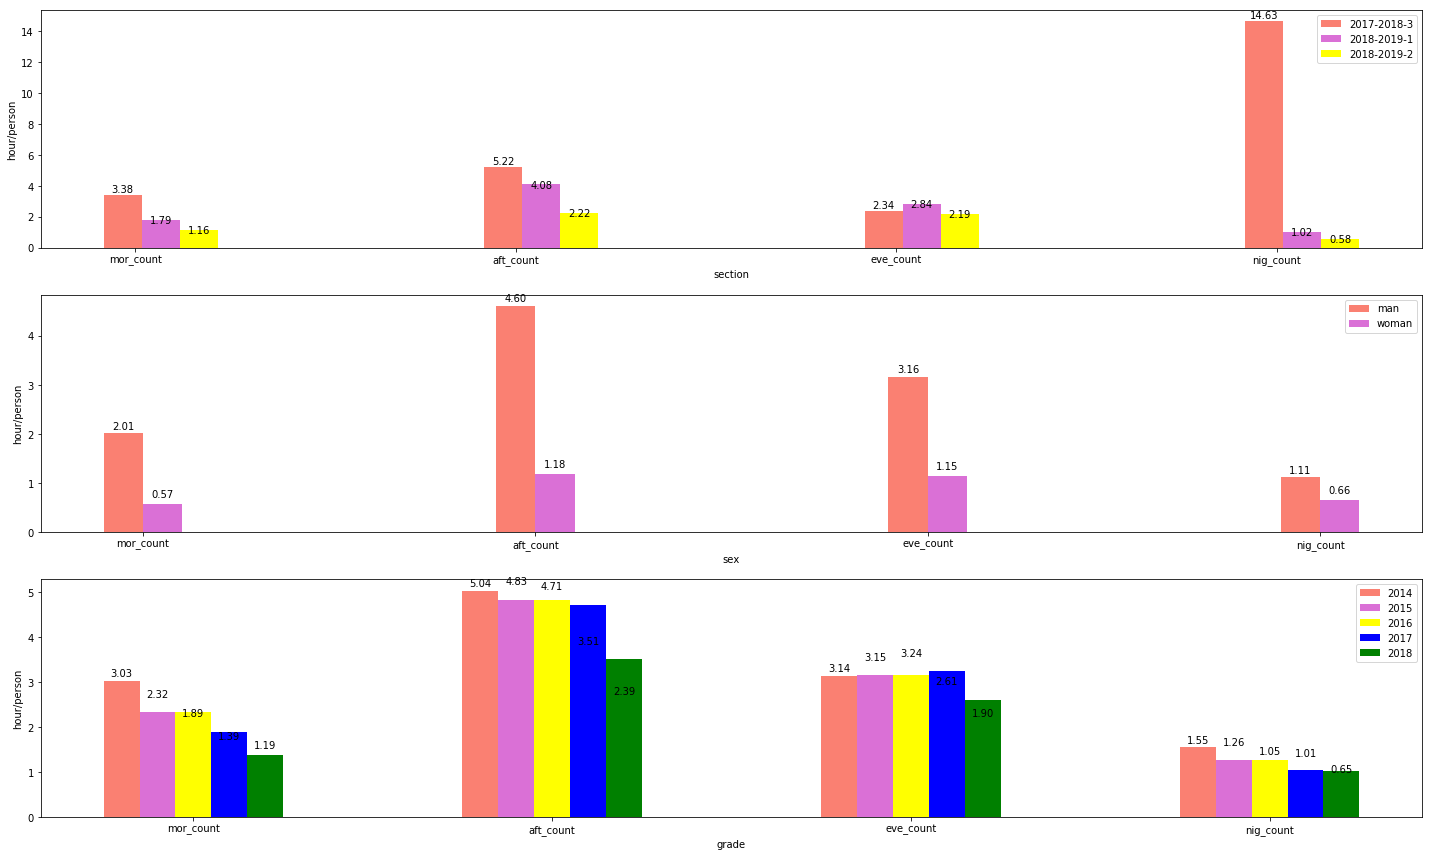

In [155]:
plt.figure(figsize=(20,12))

### 两个学期相比
df_secxn = df_fail.groupby(['xn','xq'])['mor_count','aft_count','eve_count','nig_count'].sum()
### 三个学期的人数
df_numxn = df_fail.groupby(['xn','xq'])['xh'].count()
df_numxn

plt.subplot(3,1,1)
X1 = np.arange(4)
z1 = df_numxn[0]
z2 = df_numxn[1]
z3 = df_numxn[2]
y1=[df_secxn.loc['2017-2018',3]['mor_count']/z1,df_secxn.loc['2017-2018',3]['aft_count']/z1,df_secxn.loc['2017-2018',3]['eve_count']/z1,df_secxn.loc['2017-2018',3]['nig_count']/z1]
y2=[df_secxn.loc['2018-2019',1]['mor_count']/z2,df_secxn.loc['2018-2019',1]['aft_count']/z2,df_secxn.loc['2018-2019',1]['eve_count']/z2,df_secxn.loc['2018-2019',1]['nig_count']/z2]
y3=[df_secxn.loc['2018-2019',2]['mor_count']/z3,df_secxn.loc['2018-2019',2]['aft_count']/z3,df_secxn.loc['2018-2019',2]['eve_count']/z3,df_secxn.loc['2018-2019',2]['nig_count']/z3]
bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X1,y1,bar_width,label='2017-2018-3',color='salmon')
plt.bar(X1+bar_width,y2,bar_width,label='2018-2019-1',color='orchid')
plt.bar(X1+bar_width*2,y3,bar_width,label='2018-2019-2',color='yellow')

for x,y in zip(X1,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X1,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
for x,y in zip(X1,y3):
    plt.text(x+bar_width*2,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment
    
plt.legend(loc='best')
plt.xlabel('section')
plt.ylabel('hour/person')
plt.xticks(X1+bar_width/3,tick_label)


### 男女生相比
df_secsex = df_fail.groupby(['sex'])['mor_count','aft_count','eve_count','nig_count'].sum()

### 男女生人数
df_numsex = df_fail.groupby(['sex'])['xh'].count()
df_numsex

plt.subplot(3,1,2)
X2 =np.arange(4)
z2 = df_numsex[0]
z1 = df_numsex[1]
y1=[df_secsex.loc['男']['mor_count']/z1,df_secsex.loc['男']['aft_count']/z1,df_secsex.loc['男']['eve_count']/z1,df_secsex.loc['男']['nig_count']/z1]
y2=[df_secsex.loc['女']['mor_count']/z2,df_secsex.loc['女']['aft_count']/z2,df_secsex.loc['女']['eve_count']/z2,df_secsex.loc['女']['nig_count']/z2]

bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X2,y1,bar_width,label='man',color='salmon')
plt.bar(X2+bar_width,y2,bar_width,label='woman',color='orchid')

for x,y in zip(X2,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X2,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='top') #ha=horizonal alignment

plt.legend(loc='best')
plt.xlabel('sex')
plt.ylabel('hour/person')
plt.xticks(X2+bar_width/2,tick_label)



### 所在年级相比
df_secnj = df_fail.groupby(['sznj'])['mor_count','aft_count','eve_count','nig_count'].sum()

### 所在年级人数
df_numnj = df_fail.groupby(['sznj'])['xh'].count()
df_numnj

plt.subplot(3,1,3)

X3 =np.arange(4)
z1 = df_numnj[2014]
z2 = df_numnj[2015]
z3 = df_numnj[2016]
z4 = df_numnj[2017]
z5 = df_numnj[2018]

y1=[df_secnj.loc[2014]['mor_count']/z1,df_secnj.loc[2014]['aft_count']/z1,df_secnj.loc[2014]['eve_count']/z1,df_secnj.loc[2014]['nig_count']/z1]
y2=[df_secnj.loc[2015]['mor_count']/z2,df_secnj.loc[2015]['aft_count']/z2,df_secnj.loc[2015]['eve_count']/z2,df_secnj.loc[2015]['nig_count']/z2]
y3=[df_secnj.loc[2016]['mor_count']/z3,df_secnj.loc[2016]['aft_count']/z3,df_secnj.loc[2016]['eve_count']/z3,df_secnj.loc[2016]['nig_count']/z3]
y4=[df_secnj.loc[2017]['mor_count']/z4,df_secnj.loc[2017]['aft_count']/z4,df_secnj.loc[2017]['eve_count']/z4,df_secnj.loc[2017]['nig_count']/z4]
y5=[df_secnj.loc[2018]['mor_count']/z5,df_secnj.loc[2018]['aft_count']/z5,df_secnj.loc[2018]['eve_count']/z5,df_secnj.loc[2018]['nig_count']/z5]

bar_width=0.1
tick_label=['mor_count','aft_count','eve_count','nig_count']

plt.bar(X3,y1,bar_width,label='2014',color='salmon')
plt.bar(X3+bar_width,y2,bar_width,label='2015',color='orchid')
plt.bar(X3+bar_width*2,y2,bar_width,label='2016',color='yellow')
plt.bar(X3+bar_width*3,y3,bar_width,label='2017',color='blue')
plt.bar(X3+bar_width*4,y4,bar_width,label='2018',color='green')

for x,y in zip(X2,y1):
    plt.text(x,y+0.05,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment 对齐
for x,y in zip(X2,y2):
    plt.text(x+bar_width,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y3):
    plt.text(x+bar_width*2,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y4):
    plt.text(x+bar_width*3,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment
for x,y in zip(X2,y5):
    plt.text(x+bar_width*4,y+0.30,'%.2f' % y,ha='center',va='bottom') #ha=horizonal alignment

plt.legend(loc='best')
plt.xlabel('grade')
plt.ylabel('hour/person')
plt.xticks(X3+bar_width*4/2,tick_label)

plt.tight_layout()

plt.show()

- 挂科的人熬夜特别严重
- 其他规律符合整体规律

# 5. 特征选择

## 5.1 结合交叉验证的RFECV

In [156]:
df.head(2)

,xh,xn,xq,avg_score,fail_count,fail,faculty,specialty,sznj,sex,nation,game_time,vedio_time,live_time,vine_time,total_time,mor_count,aft_count,eve_count,nig_count,Sun,Mon,Tue,Wed,Thu,Fri,Sat
0,201695012,2018-2019,1,70.700000,0,0,352,6110,2016,女,1.0,0.423889,0.096389,0.0,0.0,0.520278,0.103333,0.190556,0.177778,0.048611,0.000000,0.0,0.096389,0.000000,0.0,0.423889,0.0
1,201625017,2018-2019,1,86.384615,0,0,352,6110,2016,男,1.0,9.136111,0.000000,0.0,0.0,9.136111,0.000000,3.105556,6.030556,0.000000,1.474722,0.0,0.000000,5.623333,0.0,2.038056,0.0


In [157]:
dataset = df.copy()
sex = pd.get_dummies(dataset['sex'],prefix='sex')
dataset = dataset.join(sex)
dataset.drop(columns=['sex'],inplace=True)
X = dataset[['xq','total_time','nig_count','Tue']].values
y = dataset[['fail']].values.ravel()

In [ ]:
# 特征选择
from sklearn.feature_selection import SelectKBest # 移除topK外的特征
from sklearn.feature_selection import chi2        # 卡方检验

skb = SelectKBest(chi2,k=2)
new_data = skb.fit_transform(X,y)

In [ ]:
new_data

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = svc,         # 学习器
              step = 1,                # 每次迭代移除特征个数
              cv = StratifiedKFold(2), # 交叉验证次数
              scoring =  'accuracy',   # 学习器的评价标准
              verbose = 1,            # 默认为0，不显式中间过程，1显示
              n_jobs = 3).fit(X,y)             # 默认不使用并行计算，单核计算

print("RFECV特征选择结果——————————————————————")
print("有效特征个数：%d" % rfecv.n_features_)
print('全部特征等级：%s' % list(rfecv.ranking_))

In [ ]:
X_RFECV = rfecv.transform(x.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=28,test_size=0.25,train_size=0.75)
svc_test = SVC(kernel='linear').fit(X_train,y_train)
print("score:",svc_test.score(X_test,y_test))

In [ ]:
dataset = df.copy()
sex = pd.get_dummies(dataset['sex'],prefix='sex')
dataset = dataset.join(sex)
dataset.drop(columns=['sex'],inplace=True)
X = dataset[['xq','avg_score','sznj','total_time','aft_count','nig_count','Tue','Fri','Sun','Sat']]
y = dataset[['fail']].values.ravel()

from sklearn.svm import SVC
svc = SVC(kernel='linear')
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator = svc,         # 学习器
              step = 1,                # 每次迭代移除特征个数
              cv = StratifiedKFold(2), # 交叉验证次数
              scoring =  'accuracy',   # 学习器的评价标准
              verbose = 1,            # 默认为0，不显式中间过程，1显示
              n_jobs = 1).fit(X,y)             # 默认不使用并行计算，单核计算
X_RFECV = rfecv.transform(x)
print("RFECV特征选择结果——————————————————————")
print("有效特征个数：%d" % rfecv.n_features_)
print('全部特征等级：%s' % list(rfecv.ranking_))

**简单朴素贝叶斯**

In [158]:
sex = pd.get_dummies(df['sex'],prefix='sex')
data = df.drop(columns=['sex'],axis=1)
data = data.join(sex)

In [171]:
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import time

features = ['xh','avg_score','sex_男','sex_女','faculty','sznj','total_time','aft_count','eve_count','nig_count','Sun','Mon','Thu','Wed','Thu','Fri','Sat']
X_train,X_test,y_train,y_test = train_test_split(data[features].values,data['fail'].values.ravel(),train_size= 0.8,test_size=0.2,random_state=28)
NB = BernoulliNB()
nbStart= time.time()
clf = NB.fit(X_train,y_train)
y_predict = clf.predict(X_test)
nbCostTime = time.time() - nbStart
propa = NB.predict_proba(X_test)
print('朴素贝叶斯建模%.2f秒'%(nbCostTime))
predicted = np.array(propa)
logLoss=log_loss(y_test,predicted)
print("朴素贝叶斯的log损失为:%.6f"%logLoss)

朴素贝叶斯建模0.05秒
朴素贝叶斯的log损失为:0.526948


In [164]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,clf.predict(X_test)))

0.7678929765886288


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
features = ['xh','avg_score','sex_男','sex_女','faculty','sznj','total_time','aft_count','eve_count','nig_count','Sun','Mon','Thu','Wed','Thu','Fri','Sat']
X_train,X_test,y_train,y_test = train_test_split(data[features].values,data['fail'].values.ravel(),train_size= 0.8,test_size=0.2,random_state=28)
svm = SVC(C=1,kernel='linear')
svm.fit(X_train,y_train)
print(accuracy_score(y_test,svm.predict(x_test)))

## PCA - KNN

In [131]:
import numpy as np  
import matplotlib.pyplot as plt  

dataset = df.copy()
sex = pd.get_dummies(dataset['sex'],prefix='sex')
xn = pd.get_dummies(dataset['xn'],'xn')

dataset = dataset.join(sex)
dataset = dataset.join(xn)
dataset.drop(columns=['sex','xn'],inplace=True)
x = dataset[['xn_2018-2019','xn_2017-2018','avg_score','xq','sznj','total_time','sex_男','sex_女','aft_count','nig_count','Tue','Fri','Sun','Sat']].values
y = dataset[['fail']].values.ravel()


from sklearn.model_selection import train_test_split #这里依然需要区分测试数据集和测试数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 666)
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9207920792079208

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)#测试数据集也必须降维
knn = KNeighborsClassifier()
knn.fit(x_train_reduction,y_train)
knn.score(x_test_reduction,y_test)

0.9143698153599144

In [133]:
pca = PCA(n_components=x_train.shape[1]) #保留所有的维度
pca.fit(x_train)
pca.explained_variance_ratio_

array([7.34844590e-01, 2.25566863e-01, 1.52107767e-02, 6.86407045e-03,
       5.65623976e-03, 3.97037511e-03, 3.54980496e-03, 2.25192722e-03,
       1.47914238e-03, 4.32400628e-04, 1.57134963e-04, 1.66750963e-05,
       1.61763131e-34, 2.38189252e-35])

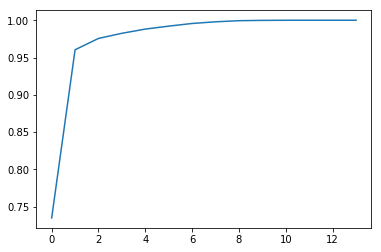

In [134]:
plt.plot([i for i in range(x_train.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train.shape[1])])
plt.show()

In [135]:
pca = PCA(0.96) #传入的参数为0.96，代表保留的百分之96的信息
pca.fit(x_train)
pca.n_components_  #结果为2

2

In [136]:
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca .transform(x_test)
knn = KNeighborsClassifier()
knn.fit(x_train_reduction,y_train)
knn.score(x_test_reduction,y_test)

0.9143698153599144

In [ ]:
### 混淆矩阵
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_predict)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict(X_test))
answer = clf.predict_proba(X_test)[:,1]
report = answer > 0.5
print(classification_report(y_test, report, target_names = ['neg', 'pos']))

In [ ]:
rate.corr()

考虑挂过科之后是否会继续挂科？

### 现在大概的想法是：
- 男女在大学期间受到网络行为的影响差异
- 男生女生之间挂科的比例，然后是挂科之后是否会再次挂科，男女生的熬夜比例
- 根据网络行为提出挂科预警，指导男女生的心理建设和学习建设
- 网络时长、熬夜对男女生均分的影响，在70分以下的

In [ ]:
result.head(3)

In [ ]:
result['nig_count'].describe()

In [ ]:
result['stay_up'] = result['nig_count'].apply(lambda x:1 if x>6 else 0)

In [ ]:
result.groupby(['sex'])['stay_up'].sum()

In [ ]:
result['sex'].value_counts()

In [ ]:
men = result[result['sex']==1]
women = result[result['sex']==0]

男女晚上熬夜的比例

In [ ]:
# 经常晚上访问网络的比例
men_stp = 3700/len(men)
women_stp = 556/len(women)

In [ ]:
men_stp # men

In [ ]:
women_stp # women

男女网络各种娱乐的时间

In [ ]:
men['game_time'].describe()

In [ ]:
men.describe()

In [ ]:
7*4*5

In [ ]:
men_game = men[men['total_time']>110]
men_game.shape[0]

In [ ]:
men_game['fail_time'].describe()

总时长超过110的人中，挂科的比例有多少

In [ ]:
len(men_game[men_game['fail']==1])/len(men_game)

一学期挂三科基本可以收到学业警告了

In [ ]:
men_game_fail = men_game[men_game['fail_time']>=3]

In [ ]:
men_game_fail.shape[0]

In [ ]:
25/(97*men_f)

**在网络行为超过110小时有44%的男生挂科了，挂科的男生中收到学业警告的比例为95.4%**

挂科之后再挂科的概率会不会变得更高

In [ ]:
score.head(3)

In [ ]:
Y = result['fail']
X = result['game_time']
plt.scatter(X,Y)
plt.show()

In [ ]:
roll = pd.read_csv('roll.csv')
roll.head(3)

In [ ]:
std_info = pd.merge(score,roll,on=['xh'],how='left')

In [ ]:
std_info.isnull().sum()

In [ ]:
std_info.head()

In [ ]:
std_info['yxsh'].value_counts()

In [ ]:
std_info['fail'] = std_info['fail_time'].apply(lambda x:1 if x>0 else 0)

In [ ]:
std_group = std_info.groupby(['yxsh'])[['fail']].sum()
std_group.head(3)

In [ ]:
std_group.describe()

In [ ]:
# 构建均值漂移聚类模型
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth=estimate_bandwidth(dataset,quantile=0.8,
                             n_samples=len(dataset))
meanshift=MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(dataset) # 使用评估的带宽构建均值漂移模型，并进行训练
labels=meanshift.labels_
cluster_num=len(np.unique(labels))
centroids=meanshift.cluster_centers_
# 下面打印出簇群种类，和质心位置信息
print('Number of Clusters: {}'.format(cluster_num))
print('\t'.join([col_name[:5] for col_name in col_names]))
for centroid in centroids:
    print('\t'.join(str(int(x)) for x in centroid))